# Predicting Airlines Ticket Price using Machine Learning

In [66]:
#import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#import data

train_data = pd.read_excel('Data_Train.xlsx')

In [68]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [70]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


After loading data, we check for null values in rows/columns.

If null values are present, then we can do following:

    a) filling NaN values with mean, medium, mode using fillna() method
    b) if very few missing values are there, we can drop these aas well.

In [71]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [72]:
train_data.shape

(10683, 11)

In [73]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


As we can see, only 1 missing value is there, hence we can drop it.

In [74]:
train_data.dropna(inplace=True)

In [75]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Pre-processing and featurizing 'Date_of_Journey'

i.e. pre-process it and extract date, month, year from 'Date_of_Journey' feature

In [76]:
data = train_data.copy()

In [77]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [78]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can see 'Date_of_Journey' feature is of object type, we need to convert it into timestamp because our model will not be able to understand string literal, so let's convert it into timestamp.

To do this we require pandas to_datetime to convert object data type to datetime dtype. 

In [79]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [80]:
n = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
result = map(change_into_datetime, n)

In [81]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [82]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [83]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-01 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-01 05:50:00,2022-09-01 13:15:00,7h 25m,2 stops,No info,7662


In [84]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [85]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

We observed that the given data belongs to year 2019 only, hence extracting year feature and using it as an input to our
machine learning model makes no sense.

But if the dataset includes more than one year, then it may impact.

### Feature Engineering of "Date_of_Journey" and extracting day, month, year features

In [86]:
#define a fuction to extract day, month,year

def extract_day_month_year(col):
    data['Journey_day'] = data[col].dt.day
    data['Journey_month'] = data[col].dt.month
    data['Journey_year'] = data[col].dt.year

In [87]:
extract_day_month_year('Date_of_Journey')

In [88]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-01 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-01 05:50:00,2022-09-01 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [89]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [90]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-01 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-01 05:50:00,2022-09-01 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


### Let's clean and featurize 'Dep_Time' and 'Arrival_Time'

In [91]:
# define a function to extract hour and minute

def extract_hour_minute(col):
    data[col+'_hour'] = data[col].dt.hour
    data[col+'_minute'] = data[col].dt.minute
    data.drop(col, axis=1, inplace=True)  #droppping columns 

In [92]:
for feature in ['Dep_Time', 'Arrival_Time']:
    extract_hour_minute(feature)

In [93]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### Analyzing when most flights will take off

In [94]:
#let's define a function to convert the flight Dep_Time into mid_night, morning, afternoon and evening time

def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return "Early morning"
    
    elif (x>8) and (x<=12):
        return "Morning"
    
    if (x>12) and (x<=16):
        return "Noon"
    
    if (x>16) and (x<=20):
        return "Evening"
    
    if (x>20) and (x<=24):
        return "Night"
    
    else:
        return "Late night"
    
#This function takes flight departure time and convert into appropriate format

<AxesSubplot:>

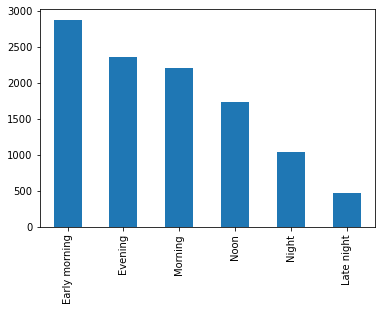

In [111]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

Similarly, we can represent this data on a pie chart or a donut chart

<AxesSubplot:ylabel='Dep_Time_hour'>

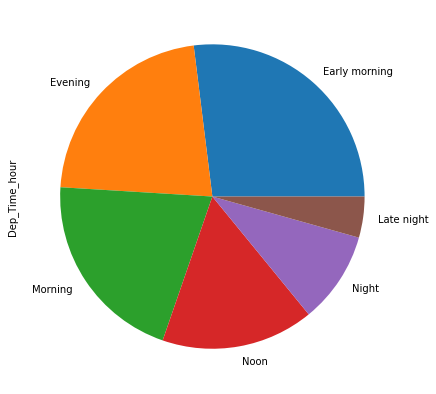

In [118]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie', figsize=(7,7))

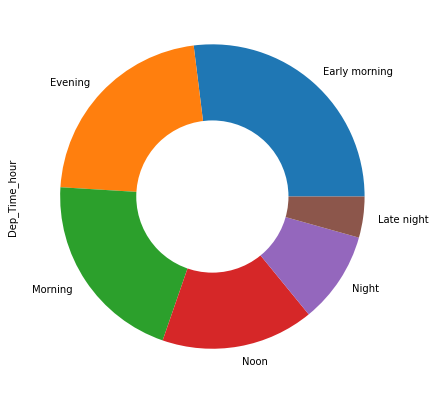

In [128]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie', figsize=(7,7), pctdistance=0.15)

centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

### Using cufflinks and plotly to make our 